In [1]:
#Import statements
from __future__ import print_function
import keras
import warnings
warnings.filterwarnings("ignore")
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization
from keras import backend as K
from keras.optimizers import Adam, Adadelta
from keras.losses import categorical_crossentropy
from prettytable import PrettyTable    

Using TensorFlow backend.


In [0]:
# Model parameters
batch_size = 128
num_classes = 10
epoch = 12
# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# loading and splitting the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
#Normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

<b>1. 1 CNN(3 layers)+ relu + adam +Batch normalization + Dropout with kernel size = (3*3)</b>

In [0]:
model=Sequential()
# Adding first layer
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Second layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding third layer
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
#axis=1 since we are using channels_first data format
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
batch_normalization_5 (Batch (None, 11, 11, 32)        44        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 16)          4624      
_________________________________________________________________
batch_normalization_6 (Batch (None, 3, 3, 16)          12        
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epoch,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.4069 - acc: 0.8740 - val_loss: 0.1157 - val_acc: 0.9648
Epoch 2/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1156 - acc: 0.9662 - val_loss: 0.0784 - val_acc: 0.9768
Epoch 3/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0866 - acc: 0.9737 - val_loss: 0.0675 - val_acc: 0.9792
Epoch 4/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0712 - acc: 0.9782 - val_loss: 0.0672 - val_acc: 0.9803
Epoch 5/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0608 - acc: 0.9812 - val_loss: 0.0615 - val_acc: 0.9817
Epoch 6/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0511 - acc: 0.9842 - val_loss: 0.0536 - val_acc: 0.9837
Epoch 7/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0462 - acc: 0.9862 - val_loss: 0.0629 - val_acc

Test score: 0.05342528630345478
Test accuracy: 0.986


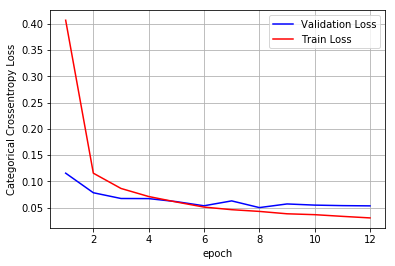

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<b>1. 2 CNN(5 layers)+ relu + adam +Batch normalization + Dropout with kernel size = (5*5)</b>

In [23]:
model = Sequential()

# Adding first layer
model.add(Conv2D(40, kernel_size = (5, 5), activation = "relu", input_shape = input_shape))
model.add(Dropout(0.25))

# Adding second layer
model.add(Conv2D(60, kernel_size = (5, 5), activation = "relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = (1, 1)))


# Adding third layer
model.add(Conv2D(70, kernel_size = (5, 5), activation = "relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization(axis=1))

# Adding fourth layer
model.add(Conv2D(90, kernel_size = (5, 5), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(axis=1))

# Adding fifth layer
model.add(Conv2D(100, kernel_size = (5, 5), activation = "relu"))
model.add(MaxPooling2D(pool_size = (1, 1)))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))

#Softmax
model.add(Dense(num_classes, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 24, 24, 40)        1040      
_________________________________________________________________
dropout_43 (Dropout)         (None, 24, 24, 40)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 20, 20, 60)        60060     
_________________________________________________________________
dropout_44 (Dropout)         (None, 20, 20, 60)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 20, 20, 60)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 16, 16, 70)        105070    
_________________________________________________________________
dropout_45 (Dropout)         (None, 16, 16, 70)        0         
__________

In [24]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epoch,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 960s 16ms/step - loss: 0.2118 - acc: 0.9349 - val_loss: 0.0499 - val_acc: 0.9849
Epoch 2/12
60000/60000 [==============================] - 958s 16ms/step - loss: 0.0645 - acc: 0.9819 - val_loss: 0.0358 - val_acc: 0.9900
Epoch 3/12
60000/60000 [==============================] - 959s 16ms/step - loss: 0.0483 - acc: 0.9863 - val_loss: 0.0264 - val_acc: 0.9925
Epoch 4/12
60000/60000 [==============================] - 961s 16ms/step - loss: 0.0395 - acc: 0.9888 - val_loss: 0.0300 - val_acc: 0.9913
Epoch 5/12
60000/60000 [==============================] - 960s 16ms/step - loss: 0.0382 - acc: 0.9895 - val_loss: 0.0290 - val_acc: 0.9913
Epoch 6/12
60000/60000 [==============================] - 961s 16ms/step - loss: 0.0304 - acc: 0.9919 - val_loss: 0.0334 - val_acc: 0.9909
Epoch 7/12
60000/60000 [==============================] - 968s 16ms/step - loss: 0.0281 - acc: 0.9918 - val_loss: 0.

Test score: 0.027181752927140496
Test accuracy: 0.9932


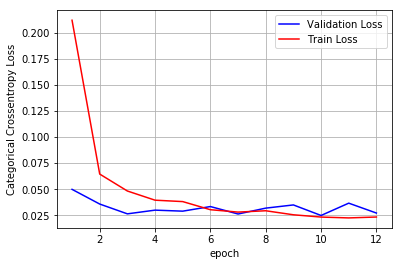

In [25]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<b>1. 3 CNN(7 layers)+ relu + adam +Batch normalization + Dropout with various kernel sizes</b>

In [26]:
model=Sequential()
#Adding first layer
model.add(Conv2D(128, kernel_size=(7, 7),activation='relu',input_shape=input_shape))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(1, 1)))


#Adding Second Layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization(axis=1))

#Adding Third Layer
model.add(Conv2D(32,kernel_size=(5,5),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(1,1)))

#Fourth layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(BatchNormalization(axis=1))

#Fifth layer
model.add(Conv2D(16, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(1,1)))

#Sixth Layer
model.add(Conv2D(16,kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))

#Seventh Layer
model.add(Conv2D(8,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected layer
#Flattening
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))

#Softmax
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 22, 22, 128)       6400      
_________________________________________________________________
dropout_47 (Dropout)         (None, 22, 22, 128)       0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 20, 20, 64)        73792     
_________________________________________________________________
batch_normalization_28 (Batc (None, 20, 20, 64)        80        
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 16, 16, 32)        51232     
_________________________________________________________________
dropout_48 (Dropout)         (None, 16, 16, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epoch,verbose=1,validation_data=(x_test, y_test))

W0819 12:30:20.541568 140130769213312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 12:30:20.669526 140130769213312 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 697s 12ms/step - loss: 0.5350 - acc: 0.8237 - val_loss: 0.1080 - val_acc: 0.9736
Epoch 2/12
60000/60000 [==============================] - 689s 11ms/step - loss: 0.1094 - acc: 0.9667 - val_loss: 0.0787 - val_acc: 0.9799
Epoch 3/12
60000/60000 [==============================] - 684s 11ms/step - loss: 0.0792 - acc: 0.9766 - val_loss: 0.0484 - val_acc: 0.9869
Epoch 4/12
60000/60000 [==============================] - 685s 11ms/step - loss: 0.0635 - acc: 0.9808 - val_loss: 0.0502 - val_acc: 0.9867
Epoch 5/12
60000/60000 [==============================] - 684s 11ms/step - loss: 0.0550 - acc: 0.9833 - val_loss: 0.0436 - val_acc: 0.9878
Epoch 6/12
60000/60000 [==============================] - 688s 11ms/step - loss: 0.0486 - acc: 0.9851 - val_loss: 0.0456 - val_acc: 0.9861
Epoch 7/12
60000/60000 [==============================] - 690s 11ms/step - loss: 0.0455 - acc: 0.9862 - val_loss: 0.

Test score: 0.031061326131038368
Test accuracy: 0.9911


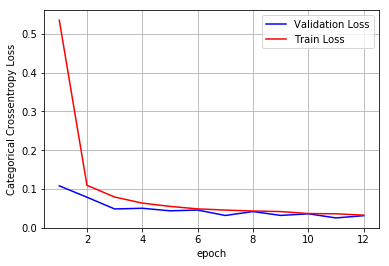

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<b>Observations</b>

In [4]:
x = PrettyTable()
x.field_names = ["Architecture", "Accuracy-%"]
x.add_row(["3 layer CNN,kernel size=(3*3)","98.6"])
x.add_row(["5 layer CNN,kernel size=(5*5)","99.3"])
x.add_row(["7 layer CNN,different kernel sizes","99.1"])
print(x)

+------------------------------------+------------+
|            Architecture            | Accuracy-% |
+------------------------------------+------------+
|   3 layer CNN,kernel size=(3*3)    |    98.6    |
|   5 layer CNN,kernel size=(5*5)    |    99.3    |
| 7 layer CNN,different kernel sizes |    99.1    |
+------------------------------------+------------+


<b>3 layer architecture</b>
#Conv2d-->Maxpooling-->Conv2d-->BN-->Conv2d-->Maxpooling-->Conv2d-->BN-->Conv2d-->Maxpooling-->Flatten,dense-->Dropout-->softmax

<b>5 layer architecture</b>
#Conv2d-->drouput-->Conv2d-->dropout-->Maxpooling-->Conv2d-->dropout-->BN-->Conv2d-->Maxpooling-->BN-->#Conv2d-->drouput-->Conv2d-->-->dropout-->Maxpooling-->Conv2d-->dropout-->BN-->Conv2d-->Maxpooling-->Flatten,dense-->Dropout-->Softmax

<b>7 layer architecture</b>
#Conv2d-->drouput-->Maxpooling-->Conv2d-->dropout-->BN-->Conv2d-->dropout-->Maxpooling-->Conv2d-->dropout-->Maxpooling-->BN-->Conv2d-->BN-->Maxpooling-->Conv2d-->BN-->Dropout-->Maxpooling-->Conv2d-->Maxpooling-->Flatten,dense-->Dropout-->softmax

Accuracy got increased while increasing the number of layers,but it slightly reduced on using different kernel sizes with 7 layers compared to 5 layer CNN.
